# [Opikanoba.org](https://opikanoba.org)

## Extraction beta Publique Correspondance MSSanté 
Ce notebook se base sur l'extraction publique du 28/05/2018 disponible sur le site de l'ASIP Sante.
Elle est téléchargeable dans la rubrique [Extractions en libre accès](https://annuaire.sante.fr/web/site-pro/extractions-mss). Le fichier est téléchargé localement dans le répertoire `/tmp/asip`.

In [5]:
fname='/tmp/asip/Extraction_Correspondance_MSSante_201805280855.txt'

Redéfinition des clés pour enlever les espaces et autres caractères. Plus pratique à manipuler.

In [6]:
KEYS_CORRESP = ["type_bal", "adresse_bal", "type_identifiant_pp", "identifiant_pp",
        "identification_nationale_pp", "type_identifiant_structure", "identification_structure","service_rattachement", "civilite_exercice", "nom_exercice", "prenom_exercice",
        "categorie_professionnelle", "libelle_categorie_professionelle", "code_profession",
        "libelle_profession", "code_savoir_faire", "libelle_savoir_faire",
        "dematerialisation", "raison_sociale_structure_bal", "enseigne_commerciale_structure_bal",
        "complement_localisation_structure_bal", "complement_distribution_structure_bal",
        "numero_voie_structure_bal", "complement_numero_voie_structure_bal",
        "type_voie_structure_bal", "libelle_voie_structure_bal", "lieu_dit_mention_structure_bal",
        "ligne_acheminement_structure_bal", "code_postal_structure_bal",
        "departement_structure_bal", "pays_structure_bal"]

In [8]:
import pandas

df=pandas.read_csv(fname, delimiter='|', names=KEYS_CORRESP, header=0, index_col=False)

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Nombre de lignes du fichier de données

In [72]:
len(df)

125268

### Professions présentes dans le fichier

In [73]:
df.libelle_profession.value_counts()

Médecin                              81817
Infirmier                            13135
Pharmacien                            5990
Orthophoniste                         5651
Masseur-Kiné                          5101
Sage-Femme                            2101
Chirurgien-Dentiste                   1613
Orthoptiste                            235
Pédicure-Podologue                     211
Diététicien                            206
Ergothérapeute                          87
Psychomotricien                         74
Manipulateur ERM                        71
Technicien de laboratoire médical       27
Audioprothésiste                        11
Opticien-Lunetier                        4
Orthoprothésiste                         2
Orthopédiste-Orthésiste                  2
Podo-Orthésiste                          1
Name: libelle_profession, dtype: int64

In [74]:
df['identifiant_pp'].nunique()

106653

In [75]:
df.type_bal.nunique()

2

Type de boite aux lettres : PER pour personnel et ORG pour Organisationnelle

In [76]:
df.type_bal.value_counts()

PER    116339
ORG      8929
Name: type_bal, dtype: int64

In [9]:
df2=df.loc[df.type_bal=='PER']

In [10]:
len(df2)

116339

Suppression des enregistrements en double, et extraction des fournisseurs d'adresse MSSanté

In [11]:
df3 = df.loc[df2.drop_duplicates('adresse_bal').adresse_bal.dropna().index]

In [12]:
mss_providers = df3.adresse_bal.str.split('@', expand=True).get(1)

In [13]:
mss_providers.value_counts().head(10)

medecin.mssante.fr                     25207
aura.mssante.fr                         9799
pro.mssante.fr                          5764
infirmier.mssante.fr                    5382
ramsaygds.mssante.fr                    5040
medecin.mp.mssante.fr                   4584
ssa.mssante.fr                          4263
orthophoniste.mssante.fr                4206
sephira.mssante.fr                      3974
masseur-kinesitherapeute.mssante.fr     2710
Name: 1, dtype: int64

In [14]:
#_df=df[df['adresse_bal'].str.contains('medecin.mssante.fr')]
#_df.adresse_bal.value_counts()[_df.adresse_bal.value_counts()>4]

Focus sur les CHU

In [15]:
chu_mss=df3[df3['adresse_bal'].str.match('.*((ch(r?)u-)|aphm|aphp).*')]
chu_vc = chu_mss.adresse_bal.value_counts()[chu_mss.adresse_bal.value_counts()>1]


Vérification qu'il n'y a pas de doublons : aucun enregistrement dans chu_vc

In [16]:
chu_vc

Series([], Name: adresse_bal, dtype: int64)

In [17]:
chu_vals=mss_providers.value_counts().filter(regex='.*((ch(r?)u-)|aphm|aphp).*', axis=0)

In [20]:
chu_vals

chu-montpellier.mssante.fr        1921
chru-strasbourg.mssante.fr        1412
chu-toulouse.mssante.fr           1178
chu-nice.mssante.fr                946
aphp.mssante.fr                    928
chu-rouen.mssante.fr               834
chu-tours.mssante.fr               748
chu-dijon.mssante.fr               692
chu-nimes.mssante.fr               652
chu-poitiers.mssante.fr            652
chu-limoges.mssante.fr             635
chu-caen.mssante.fr                626
chu-besancon.mssante.fr            579
chu-bordeaux.mssante.fr             85
chu-clermontferrand.mssante.fr      82
aphm.mssante.fr                      9
chu-lyon.mssante.fr                  4
chru-lille.mssante.fr                2
chu-rennes.mssante.fr                1
chu-amiens.mssante.fr                1
Name: 1, dtype: int64

In [21]:
type(chu_vals)

pandas.core.series.Series

In [22]:
chu_vals.head()


chu-montpellier.mssante.fr    1921
chru-strasbourg.mssante.fr    1412
chu-toulouse.mssante.fr       1178
chu-nice.mssante.fr            946
aphp.mssante.fr                928
Name: 1, dtype: int64

In [24]:
chu_vals.axes

[Index(['chu-montpellier.mssante.fr', 'chru-strasbourg.mssante.fr',
        'chu-toulouse.mssante.fr', 'chu-nice.mssante.fr', 'aphp.mssante.fr',
        'chu-rouen.mssante.fr', 'chu-tours.mssante.fr', 'chu-dijon.mssante.fr',
        'chu-nimes.mssante.fr', 'chu-poitiers.mssante.fr',
        'chu-limoges.mssante.fr', 'chu-caen.mssante.fr',
        'chu-besancon.mssante.fr', 'chu-bordeaux.mssante.fr',
        'chu-clermontferrand.mssante.fr', 'aphm.mssante.fr',
        'chu-lyon.mssante.fr', 'chru-lille.mssante.fr', 'chu-rennes.mssante.fr',
        'chu-amiens.mssante.fr'],
       dtype='object')]

In [25]:
chu_vals.data

In [26]:
chu_vals.values

array([1921, 1412, 1178,  946,  928,  834,  748,  692,  652,  652,  635,
        626,  579,   85,   82,    9,    4,    2,    1,    1])

In [39]:
list(chu_vals.index.get_values())

['chu-montpellier.mssante.fr',
 'chru-strasbourg.mssante.fr',
 'chu-toulouse.mssante.fr',
 'chu-nice.mssante.fr',
 'aphp.mssante.fr',
 'chu-rouen.mssante.fr',
 'chu-tours.mssante.fr',
 'chu-dijon.mssante.fr',
 'chu-nimes.mssante.fr',
 'chu-poitiers.mssante.fr',
 'chu-limoges.mssante.fr',
 'chu-caen.mssante.fr',
 'chu-besancon.mssante.fr',
 'chu-bordeaux.mssante.fr',
 'chu-clermontferrand.mssante.fr',
 'aphm.mssante.fr',
 'chu-lyon.mssante.fr',
 'chru-lille.mssante.fr',
 'chu-rennes.mssante.fr',
 'chu-amiens.mssante.fr']

In [51]:
sdf = pandas.DataFrame(data={'CHU':list(chu_vals.index.get_values()), 'nb':list(chu_vals.values)})

In [52]:
sdf

,CHU,nb
0,chu-montpellier.mssante.fr,1921
1,chru-strasbourg.mssante.fr,1412
2,chu-toulouse.mssante.fr,1178
3,chu-nice.mssante.fr,946
4,aphp.mssante.fr,928
5,chu-rouen.mssante.fr,834
6,chu-tours.mssante.fr,748
7,chu-dijon.mssante.fr,692
8,chu-nimes.mssante.fr,652
9,chu-poitiers.mssante.fr,652


Graph avec seaborn

In [2]:
import seaborn as sns

In [57]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(12,10)})

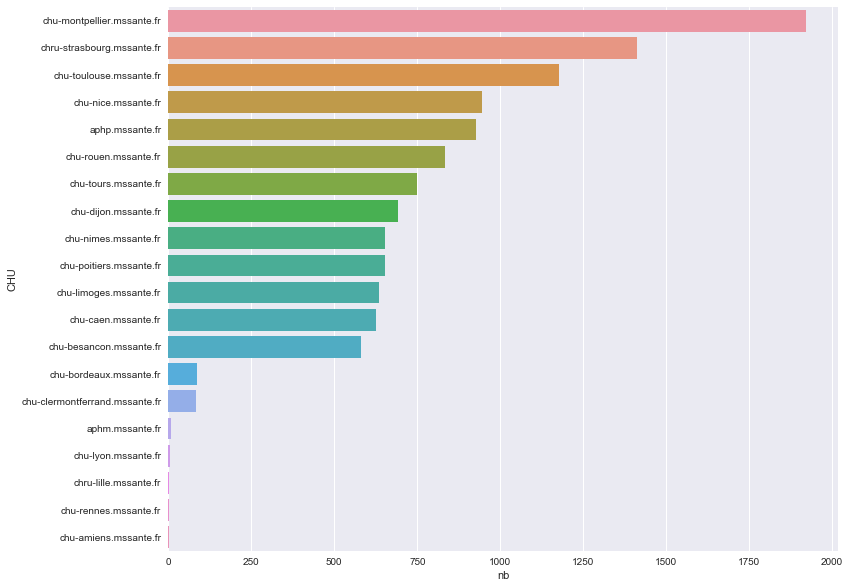

In [58]:
ax = sns.barplot(y="CHU", x='nb', data=sdf)